<a href="https://colab.research.google.com/github/hiiamjay/Deep-Learning/blob/main/Experiments/Exp-9/Face_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install utils
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
%pwd

Tensorflow version: 2.4.1


'/content'

## Loading Data

In [2]:
def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12, 20))
    ctr = 0

    for expression in os.listdir("/content/Project/train/"):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img("/content/Project/train/" + expression + "/" +os.listdir("/content/Project/train/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1afmZWHWn6sKs2EyygCwfJ4DvPg2EwhnC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1afmZWHWn6sKs2EyygCwfJ4DvPg2EwhnC" -O Project.zip && rm -rf /tmp/cookies.txt
!unzip Project.zip

Streaming output truncated to the last 5000 lines.
  inflating: Project/train/sad/Training_56944263.jpg  
  inflating: Project/train/sad/Training_80899611.jpg  
  inflating: Project/train/sad/Training_97157512.jpg  
  inflating: Project/train/sad/Training_22830901.jpg  
  inflating: Project/train/sad/Training_66723931.jpg  
  inflating: Project/train/sad/Training_8706291.jpg  
  inflating: Project/train/sad/Training_2063449.jpg  
  inflating: Project/train/sad/Training_36073435.jpg  
  inflating: Project/train/sad/Training_74279721.jpg  
  inflating: Project/train/sad/Training_21124228.jpg  
  inflating: Project/train/sad/Training_69633580.jpg  
  inflating: Project/train/sad/Training_55501548.jpg  
  inflating: Project/train/sad/Training_21934687.jpg  
  inflating: Project/train/sad/Training_48637403.jpg  
  inflating: Project/train/sad/Training_1382203.jpg  
  inflating: Project/train/sad/Training_49722211.jpg  
  inflating: Project/train/sad/Training_97677728.jpg  
  inflating: Proj

### Showing Images

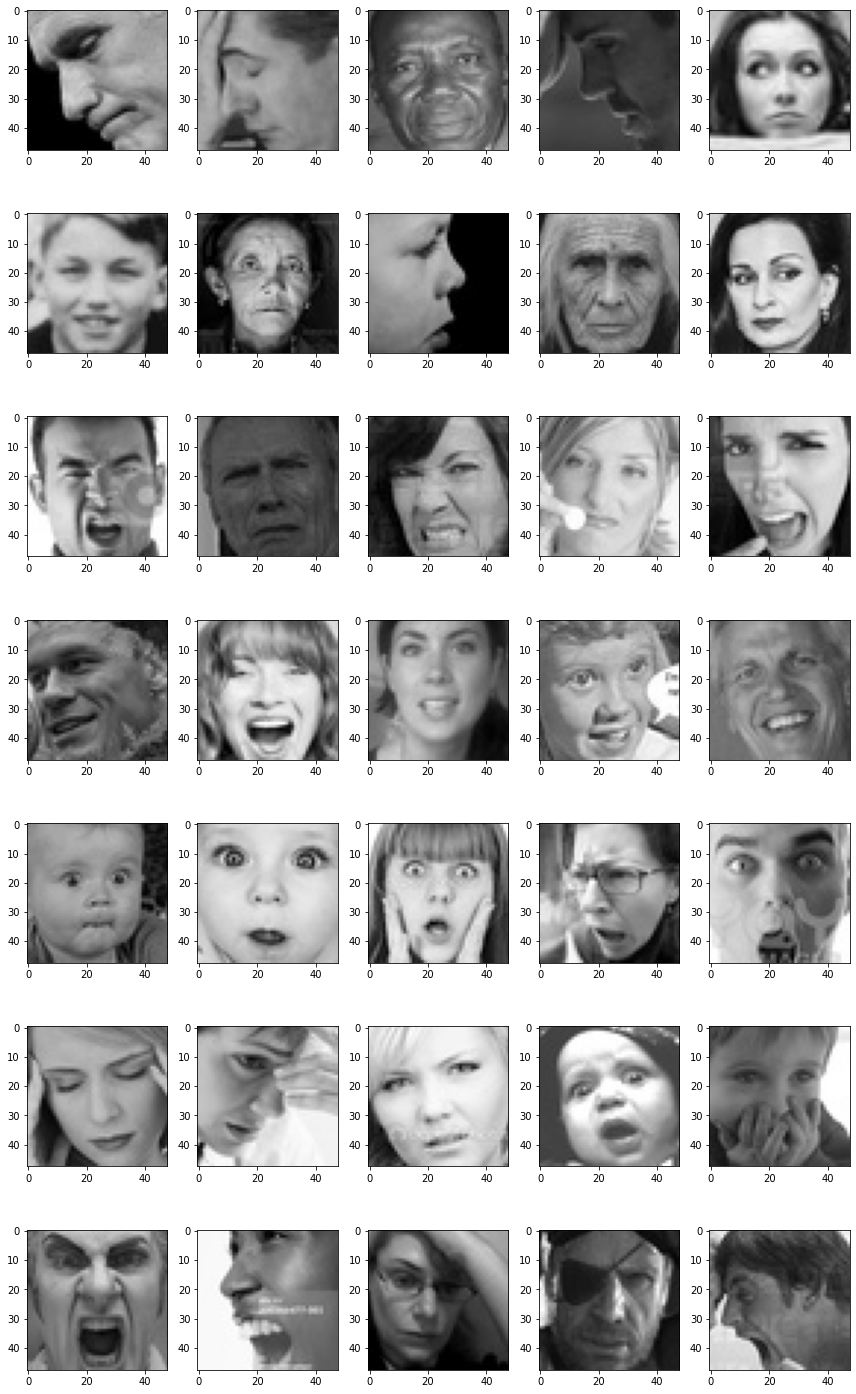

In [4]:
plot_example_images(plt).show()

In [5]:
for expression in os.listdir("/content/Project/train/"):
    print(str(len(os.listdir("/content/Project/train/" + expression))) + " " + expression + " images")

4830 sad images
4965 neutral images
436 disgust images
7214 happy images
3171 surprise images
4097 fear images
3995 angry images


## Performing Image Augmentation

In [6]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip = True)

train_generator = datagen_train.flow_from_directory("/content/Project/train/", target_size = (img_size,img_size), color_mode = "grayscale",
                                                    batch_size = batch_size, class_mode = 'categorical', subset = 'training', shuffle = True)

val_generator = datagen_train.flow_from_directory("/content/Project/train/", target_size = (img_size,img_size), color_mode = "grayscale", 
                                                  batch_size = batch_size, class_mode = 'categorical', subset = 'validation', shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True)

test_generator = datagen_test.flow_from_directory("/content/Project/test/", target_size = (img_size,img_size), color_mode = "grayscale",
                                                  batch_size = batch_size, class_mode = None, shuffle = False)

Found 28708 images belonging to 7 classes.
Found 0 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Making A Model

In [7]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

## Training And Evaluating The Model

In [8]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = val_generator.n//val_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint, reduce_lr]

history = model.fit(x = train_generator, steps_per_epoch = steps_per_epoch, epochs = epochs, 
                    validation_data = val_generator, validation_steps = validation_steps, 
                    callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - 47s 29ms/step - loss: 1.9517 - accuracy: 0.2565

Epoch 00001: saving model to model_weights.h5
Epoch 2/15
448/448 [==============================] - 13s 28ms/step - loss: 1.5280 - accuracy: 0.4185

Epoch 00002: saving model to model_weights.h5
Epoch 3/15
448/448 [==============================] - 12s 28ms/step - loss: 1.3444 - accuracy: 0.4832

Epoch 00003: saving model to model_weights.h5
Epoch 4/15
448/448 [==============================] - 13s 28ms/step - loss: 1.2527 - accuracy: 0.5234

Epoch 00004: saving model to model_weights.h5
Epoch 5/15
448/448 [==============================] - 13s 28ms/step - loss: 1.1959 - accuracy: 0.5438

Epoch 00005: saving model to model_weights.h5
Epoch 6/15
448/448 [==============================] - 13s 28ms/step - loss: 1.1439 - accuracy: 0.5651

Epoch 00006: saving model to model_weights.h5
Epoch 7/15
448/448 [==============================] - 13s 28ms/step - loss: 1.1153 - accuracy: 0.5736

Epo

### Plotting Accuracy and Loss

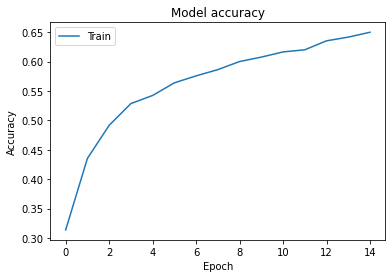

In [9]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

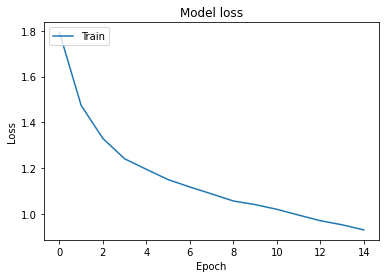

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()